# About the Dataset Simmons

# the dataset consists of 4 columns :

Customer - id of customers

Spending -  purchasing done by customer

Card - 1 says customer having credit card , 0 means not having credit card

Coupon - 0 for those who doesn't have coupon and not used , whereas 1 stands for having coupon and used while shopping

# The problem statement is that Simmons wants to know how much of the customers are using the coupouns ?

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import binarize

In [75]:
df=pd.read_excel("/content/Simmons.xls")
df.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    int64  
 1   Spending  100 non-null    float64
 2   Card      100 non-null    int64  
 3   Coupon    100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


# as we have 100 records in the dataset and no nulls values are present

In [77]:
df.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [78]:
df['Coupon'].value_counts()

,count
Coupon,
0,60
1,40


# as the dataset size is small , outlier analysis is not a good options cause we loose the information

In [79]:
# First cut of the dataset

x=df.iloc[:,1:-1]
y=df['Coupon']

# as customer id is not an imortant columns for analysis and model building

In [80]:
print(x.head())
print(y.head())

   Spending  Card
0     2.291     1
1     3.215     1
2     2.135     1
3     3.924     0
4     2.528     1
0    0
1    0
2    0
3    0
4    0
Name: Coupon, dtype: int64


# checking the Correlation b/w features

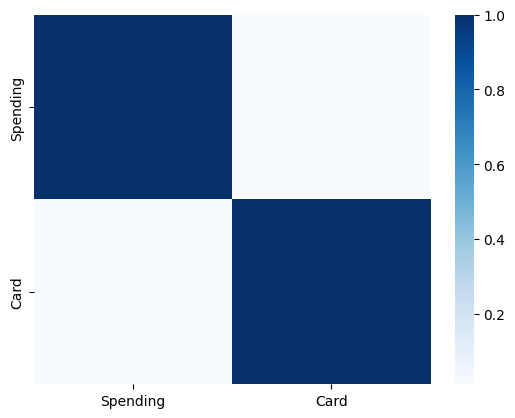

,Spending,Card
Spending,1.000000,0.011642
Card,0.011642,1.000000


In [81]:
sns.heatmap(data=x.corr(),cmap='Blues')
plt.show()
x.corr()

In [82]:
x.shape , y.shape

((100, 2), (100,))

# using Train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [84]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((75, 2), (75,), (25, 2), (25,))

# Model building

In [85]:
lr=LogisticRegression()

In [86]:
model_lr=lr.fit(x_train,y_train)

# Prediction

In [87]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [88]:
# prediction for train data for further analysis
y_pred_train=lr.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0])

In [89]:
# Probability for testing

y_prob=lr.predict_proba(x_test)[:,1].reshape(1,-1)     #reshape works like 1 row is required to me but no worries about column ,-1 is system to decide how many columns to adjust b
y_prob

array([[0.52803246, 0.49517625, 0.45705046, 0.27712842, 0.34389496,
        0.26826124, 0.27712842, 0.60767304, 0.42838832, 0.43639299,
        0.31387527, 0.23677742, 0.45705046, 0.43600217, 0.37599363,
        0.44902215, 0.46949093, 0.68519265, 0.251685  , 0.47074771,
        0.42363481, 0.56580175, 0.5279248 , 0.40305375, 0.27458272]])

In [90]:
# probability for training data for further use

y_prob_train=lr.predict_proba(x_train)[:,1].reshape(1,-1)
y_prob_train

array([[0.49618288, 0.32880558, 0.44331124, 0.33320598, 0.41459023,
        0.32890093, 0.39748721, 0.66918819, 0.25845659, 0.63670531,
        0.29274878, 0.28467622, 0.51588732, 0.41994733, 0.24343741,
        0.5285169 , 0.47961622, 0.52801323, 0.3319115 , 0.27458272,
        0.49175558, 0.6325985 , 0.24691508, 0.47090915, 0.27842841,
        0.41661746, 0.36154674, 0.49971207, 0.23623138, 0.37863254,
        0.48810439, 0.28878446, 0.28564488, 0.3723519 , 0.65307608,
        0.43809375, 0.33638085, 0.40409358, 0.23432709, 0.37285684,
        0.49971207, 0.39771263, 0.32880558, 0.25783611, 0.47390468,
        0.4288115 , 0.26521947, 0.33320598, 0.54682415, 0.45447877,
        0.44323889, 0.49652615, 0.60064794, 0.3899266 , 0.49150494,
        0.27415269, 0.27786462, 0.67461641, 0.28195703, 0.48594587,
        0.38631757, 0.31373574, 0.42812388, 0.27419567, 0.44373772,
        0.41632126, 0.64198463, 0.65707806, 0.44070086, 0.28195703,
        0.40215203, 0.43809375, 0.50973548, 0.57

# Accuracy of the model

In [91]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy of model : {accuracy}")

Accuracy of model : 0.76


In [92]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



# Confusion matrix

In [93]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  1],
       [ 5,  4]])

In [94]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()   # ravel is used for converting higher dimensional array to 1 dimensional array
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")
print(f"True Psoitive : {tp}")

True Negative : 15
False Positive : 1
False Negative : 5
True Psoitive : 4


In [95]:
# Accuracy :

Accuracy=(tn+tp)/(tn+fp+fn+tp)
print(f"Accuracy : {Accuracy:0.2f}")

# Sensitivity :

sensitivity=tp/(fn+tp)
print(f"Sensitivity : {sensitivity:0.2f}")

# Specificity :

specificity=tn/(tn+fp)
print(f"Specificity : {specificity:0.2f}")

Accuracy : 0.76
Sensitivity : 0.44
Specificity : 0.94


# **What is ROC and Why it is used ?**

# ROC, which stands for Receiver Operating Characteristic, is a graph used to visualize and evaluate the performance of a diagnostic test or classification model, plotting the true positive rate against the false positive rate at various threshold settings. It helps determine how well a test can distinguish between positive and negative cases.

True Positive Rate (TPR) or Sensitivity:
The ability of a test to correctly identify positive cases (TP / (TP + FN)).
False Positive Rate (FPR) or (1-Specificity):
The ability of a test to incorrectly identify negative cases as positive (FP / (FP + TN)

# Imbalanced Datasets:
ROC curves are particularly useful when dealing with imbalanced datasets, where one class is significantly more frequent than the other.

# finding optimal threshold
# comparing models performance
# Evaluating Diagonistics test

# ROC Curve for Training Dataset

In [96]:
log_roc_auc_01=roc_auc_score(y_train,y_pred_train)
fpr1,tpr1,threshold1=roc_curve(y_train,y_prob_train.ravel())
roc_auc_01=auc(fpr1,tpr1)

In [97]:
fpr1, tpr1 , roc_auc_01

(array([0.        , 0.        , 0.        , 0.02272727, 0.02272727,
        0.09090909, 0.11363636, 0.11363636, 0.13636364, 0.13636364,
        0.34090909, 0.36363636, 0.43181818, 0.43181818, 0.47727273,
        0.47727273, 0.56818182, 0.56818182, 0.61363636, 0.61363636,
        0.63636364, 0.65909091, 0.65909091, 0.70454545, 0.72727273,
        0.72727273, 0.77272727, 0.77272727, 0.79545455, 0.81818182,
        0.81818182, 0.90909091, 0.90909091, 1.        ]),
 array([0.        , 0.03225806, 0.09677419, 0.09677419, 0.32258065,
        0.32258065, 0.35483871, 0.38709677, 0.38709677, 0.48387097,
        0.48387097, 0.51612903, 0.51612903, 0.58064516, 0.58064516,
        0.61290323, 0.61290323, 0.67741935, 0.67741935, 0.70967742,
        0.74193548, 0.74193548, 0.77419355, 0.77419355, 0.77419355,
        0.80645161, 0.80645161, 0.83870968, 0.83870968, 0.87096774,
        0.96774194, 0.96774194, 1.        , 1.        ]),
 np.float64(0.6392961876832844))

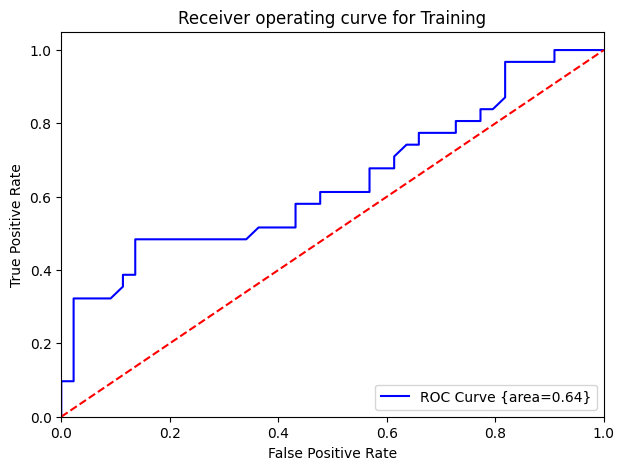

In [98]:
# plotting a visual

plt.figure(figsize=(7,5))
plt.plot(fpr1,tpr1,color='blue',label="ROC Curve {area=%0.2f}" % roc_auc_01)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating curve for Training")
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Testing Dataset

In [99]:
log_roc_auc_02=roc_auc_score(y_test,y_pred)
fpr2,tpr2,threshold2=roc_curve(y_test,y_prob.ravel())
roc_auc_02=auc(fpr2,tpr2)

In [100]:
fpr2,tpr2,roc_auc_02,threshold2

(array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.125 ,
        0.375 , 0.375 , 0.625 , 0.75  , 1.    ]),
 array([0.        , 0.11111111, 0.33333333, 0.33333333, 0.55555556,
        0.55555556, 0.66666667, 0.88888889, 0.88888889, 1.        ,
        1.        , 1.        , 1.        ]),
 np.float64(0.9027777777777777),
 array([       inf, 0.68519265, 0.56580175, 0.52803246, 0.49517625,
        0.47074771, 0.46949093, 0.45705046, 0.42838832, 0.42363481,
        0.31387527, 0.27712842, 0.23677742]))

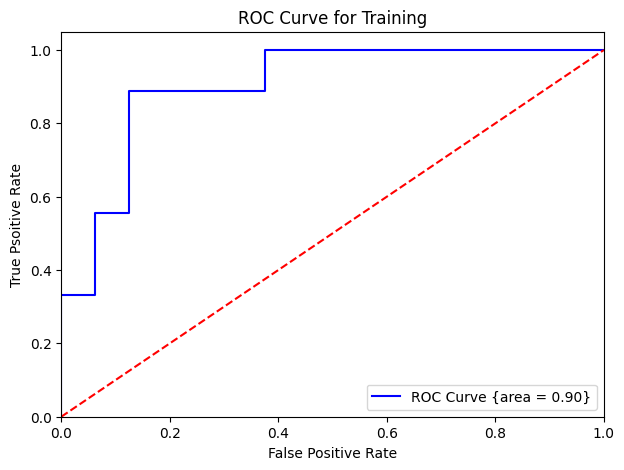

In [101]:
# plotting ROC curve for testing data

plt.figure(figsize=(7,5))
plt.plot(fpr2,tpr2,color='blue',label='ROC Curve {area = %0.2f}' % roc_auc_02)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Psoitive Rate")
plt.title("ROC Curve for Training")
plt.legend(loc='lower right')
plt.show()

# from the above ROC analysis we can see that our model is performing good for testing data but not for training data , therefore changing the thresholds will resolve let's see ?

# Checking Accuracy by taking the different threshold values

In [102]:
# threshold = 0.35

y_pred_class1=binarize(y_prob.reshape(1,-1),threshold=0.35)[0]
y_pred_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

binarize will take the threshold value and converts other values in binary classification according to threshold value

In [103]:
# converting into int type
y_pred_class1=y_pred_class1.astype('int64')
y_pred_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [104]:
confusion_matrix_2=confusion_matrix(y_test,y_pred_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [105]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_class1).ravel()   # ravel is used for converting higher dimensional array to 1 dimensional array
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")
print(f"True Psoitive : {tp}")

True Negative : 8
False Positive : 8
False Negative : 0
True Psoitive : 9


In [106]:
print(classification_report(y_test,y_pred_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [107]:
# threshold = 0.50

y_pred_class2=binarize(y_prob.reshape(1,-1),threshold=0.50)[0]

# converting into int type

y_pred_class2=y_pred_class2.astype('int64')
y_pred_class2

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [108]:
cm_3=confusion_matrix(y_test,y_pred_class2)
cm_3

array([[15,  1],
       [ 5,  4]])

In [109]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_class2).ravel()   # ravel is used for converting higher dimensional array to 1 dimensional array
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")
print(f"True Psoitive : {tp}")

True Negative : 15
False Positive : 1
False Negative : 5
True Psoitive : 4


In [110]:
print(classification_report(y_test,y_pred_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [111]:
# threshold = 0.70

y_pred_class3=binarize(y_prob.reshape(1,-1),threshold=0.70)[0]

# converting into int type

y_pred_class3=y_pred_class3.astype('int64')
y_pred_class3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [112]:
cm_4=confusion_matrix(y_test,y_pred_class3)
cm_4

array([[16,  0],
       [ 9,  0]])

In [113]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_class3).ravel()   # ravel is used for converting higher dimensional array to 1 dimensional array
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")
print(f"True Psoitive : {tp}")

True Negative : 16
False Positive : 0
False Negative : 9
True Psoitive : 0


In [114]:
print(classification_report(y_test,y_pred_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# as these thresholds value are not giving best fit accuracy

# **Calculating best optimal threshold value**

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob.ravel())
roc_auc=auc(fpr,tpr)

print(f"FPR : {fpr}")
print(f"TPR : {tpr}")
print(f"Thresolds : {thresholds}")
print(f"Area under the ROC : {roc_auc:0.2f}")


FPR : [0.     0.     0.     0.0625 0.0625 0.125  0.125  0.125  0.375  0.375
 0.625  0.75   1.    ]
TPR : [0.         0.11111111 0.33333333 0.33333333 0.55555556 0.55555556
 0.66666667 0.88888889 0.88888889 1.         1.         1.
 1.        ]
Thresolds : [       inf 0.68519265 0.56580175 0.52803246 0.49517625 0.47074771
 0.46949093 0.45705046 0.42838832 0.42363481 0.31387527 0.27712842
 0.23677742]
Area under the ROC : 0.90


In [116]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),
                    'tpr':pd.Series(tpr,index=i),
                    '1-fpr':pd.Series(1-fpr ,index=i),
                    'tf':pd.Series(tpr-(1-fpr),index=i),
                    'threshold':pd.Series(thresholds,index=i)
                    })

In [117]:
roc

,fpr,tpr,1-fpr,tf,threshold
0,0.0000,0.000000,1.0000,-1.000000,inf
1,0.0000,0.111111,1.0000,-0.888889,0.685193
2,0.0000,0.333333,1.0000,-0.666667,0.565802
3,0.0625,0.333333,0.9375,-0.604167,0.528032
4,0.0625,0.555556,0.9375,-0.381944,0.495176
5,0.1250,0.555556,0.8750,-0.319444,0.470748
6,0.1250,0.666667,0.8750,-0.208333,0.469491
7,0.1250,0.888889,0.8750,0.013889,0.457050
8,0.3750,0.888889,0.6250,0.263889,0.428388
9,0.3750,1.000000,0.6250,0.375000,0.423635


# here we have to find the best threshold whose fpr is less and tpr is more

In [118]:
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,threshold
7,0.125,0.888889,0.875,0.013889,0.45705


# optimal threshold value in ROC Curve

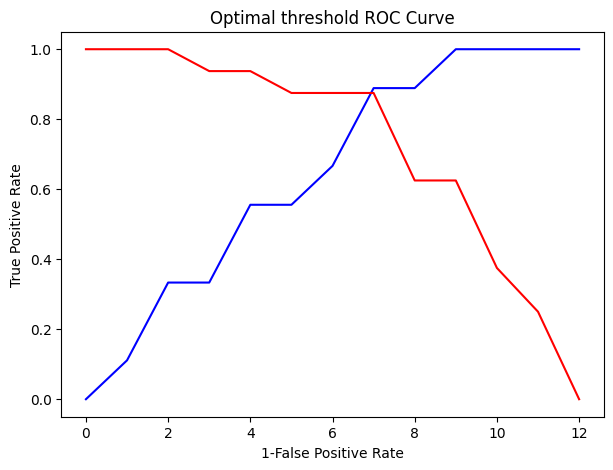

In [119]:
plt.figure(figsize=(7,5))
plt.plot(roc['tpr'],color='blue')
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Optimal threshold ROC Curve")
plt.xticks()
plt.show()

# classification report by using optimal threshold value

In [120]:
y_pred_optimal=binarize(y_prob.reshape(1,-1),threshold=0.457)[0]
y_pred_optimal

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [121]:
#converting into int datatype

y_pred_optimal=y_pred_optimal.astype('int64')
y_pred_optimal

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [122]:
confusion_matrix_best=confusion_matrix(y_test,y_pred_optimal)
confusion_matrix_best

array([[14,  2],
       [ 1,  8]])

In [123]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_optimal).ravel()
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")
print(f"True Psoitive : {tp}")

True Negative : 14
False Positive : 2
False Negative : 1
True Psoitive : 8


In [124]:
# Accuracy :

Accuracy=(tn+tp)/(tn+fp+fn+tp)
print(f"Accuracy : {Accuracy:0.2f}")

# Sensitivity :

sensitivity=tp/(fn+tp)
print(f"Sensitivity : {sensitivity:0.2f}")

# Specificity :

specificity=tn/(tn+fp)
print(f"Specificity : {specificity:0.2f}")

Accuracy : 0.88
Sensitivity : 0.89
Specificity : 0.88


In [125]:
print(classification_report(y_test,y_pred_optimal))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



# as by using the optimal threshold value precision and recall are balanced for both classes and hence model is more accurate while predicting the classes